# EDA e Analisi dei dati

Questa EDA da completare ed esplorare vi terrà occupati per questo mese quindi prendetevi tutto il tempo sia di completare che di ampliare come volete questa analisi. 

Quindi per recapitolare questo esercizio vale per:

- pratica individuale 10 e 11
- workshop 10 e 11

Vedrete la soluzione nel secondo appuntamento del workshop 11.

Buon lavoro!

## 1. Il più Nobel dei premi
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>Il Premio Nobel è forse il premio scientifico più conosciuto al mondo. Oltre all'onore, al prestigio e al sostanzioso premio in denaro, il destinatario riceve anche una medaglia d'oro raffigurante Alfred Nobel (1833 - 1896) che ha istituito il premio. Ogni anno viene assegnato a scienziati e studiosi delle categorie chimica, letteratura, fisica, fisiologia o medicina, economia e pace. Il primo Premio Nobel fu assegnato nel 1901, e all'epoca il Premio era molto eurocentrico e incentrato sugli uomini, ma oggi non è in alcun modo parziale. Certamente. Giusto?</p>
<p>Bene, lo scopriremo! La Fondazione Nobel ha reso disponibile un set di dati di tutti i vincitori del premio dall'inizio del premio, nel 1901, fino al 2016. Carichiamolo e diamo un'occhiata.</p>

In [1]:
# Caricamento delle librerie richieste
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Lettura dei dati
nobel=pd.read_csv('nobel.csv')
# Visualizza i primi dati
nobel.head(30)


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


In [107]:
# Visualizza le informazioni dei dati
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

## 2. Quindi, chi riceve il Premio Nobel?
<p>Solo guardando la prima coppia di vincitori, o premi Nobel come vengono anche chiamati, vediamo già una celebrità: Wilhelm Conrad Röntgen, il ragazzo che scoprì i raggi X. E in realtà, vediamo che tutti i vincitori del 1901 erano ragazzi provenienti dall'Europa. Ma questo accadeva nel 1901, considerando tutti i vincitori nel set di dati, dal 1901 al 2016, quale sesso e quale paese è il più comunemente rappresentato? </p>
<p>(Per <em>paese</em>, utilizzeremo il <code>paese_nascita</code> del vincitore, poiché <code>paese_organizzazione</code> è <code>NaN</code> per tutti hanno condiviso i premi Nobel.)</p>

In [4]:
# Visualizza il numero di premi Nobel (eventualmente condivisi) consegnati
# uscito tra il 1901 e il 2016
nobel.year.value_counts().sum()

911

In [4]:
# Visualizza il numero di premi vinti dai destinatari uomini e donne.
nobel.sex.value_counts()

Male      836
Female     49
Name: sex, dtype: int64

In [5]:
# Visualizza il numero di premi vinti dalle prime 10 nazionalità.
nobel.birth_country.value_counts().head(10)

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

## 3. Dominio degli Stati Uniti
<p>Forse non è così sorprendente: il premio Nobel più comune tra il 1901 e il 2016 era un uomo nato negli Stati Uniti d'America. Ma nel 1901 tutti i vincitori erano europei. Quando gli Stati Uniti hanno iniziato a dominare le classifiche dei Premi Nobel?</p>

In [46]:
# Calcolo della percentuale di vincitori nati negli Stati Uniti per decennio
# Estrae il decennio dalla colonna dell'anno


# Raggruppamento per decennio e conteggio del numero di vincitori nati negli Stati Uniti in ogni decennio


# Raggruppamento per decennio e conteggio del numero totale di vincitori in ogni decennio


# Calcolo della percentuale di vincitori nati negli Stati Uniti per decennio


# Converting the series to DataFrame for Seaborn plotting



,Decennio,Percentuale
0,1900,1.75
1,1910,7.50
2,1920,7.41
3,1930,25.00
4,1940,30.23
5,1950,29.17
6,1960,26.58
7,1970,31.73
8,1980,31.96
9,1990,40.38


In [5]:
decades=[x for x in range(1900,2020,10)]
intervallo=[x-1 for x in range(1910,2030,10)]
print(decades)
print(intervallo)

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
[1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]


In [28]:
percentuale=[]
for x,y in zip(decades,intervallo):
    tot=nobel[(nobel['year']>=x) & (nobel['year']<=y) ].laureate_id.value_counts().sum()
    USA=nobel[(nobel['year']>=x) & (nobel['year']<=y) & (nobel['birth_country']=='United States of America')].laureate_id.value_counts().sum()
    percentuale.append(round((USA*100)/tot,2))


In [29]:
USA_nobel=pd.DataFrame({'Decennio':decades,'Percentuale':percentuale})
USA_nobel

,Decennio,Percentuale
0,1900,1.75
1,1910,7.50
2,1920,7.41
3,1930,25.00
4,1940,30.23
5,1950,29.17
6,1960,26.58
7,1970,31.73
8,1980,31.96
9,1990,40.38


In [7]:
#non contando i paesi Na
& (nobel['birth_country'].notna())

SyntaxError: invalid syntax (1754688986.py, line 2)

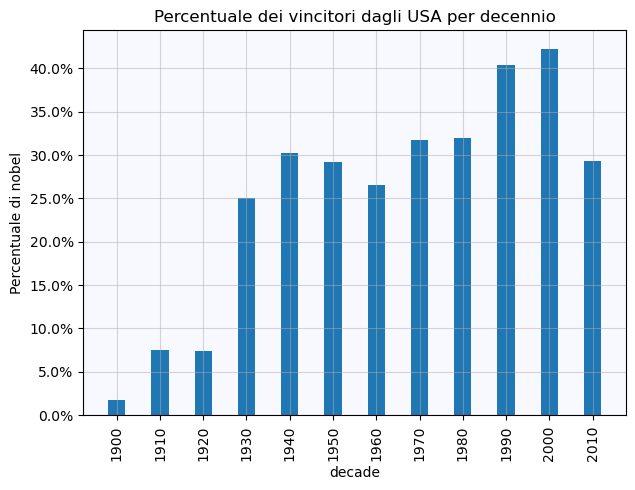

In [30]:
plt.figure(figsize=(7, 5))
plt.bar(USA_nobel['Decennio'], USA_nobel['Percentuale'], width=4) 
plt.xlabel('decade')
plt.ylabel('Percentuale di nobel')
plt.title('Percentuale dei vincitori dagli USA per decennio')
plt.xticks(USA_nobel['Decennio'],rotation=90)
plt.grid(True, alpha=0.5, zorder=1)
def percent_formatter(x, pos):
    return f'{x}%'

y_format = FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_format)
plt.show()

## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

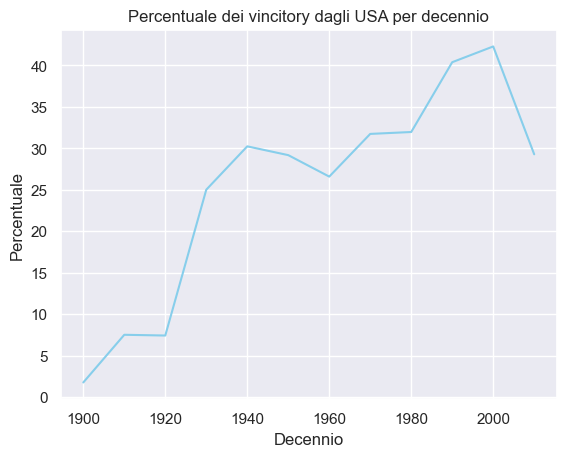

In [56]:
# Impostazione del tema del grafico


# Imposta la dimensione del grafico.


# Aggiunta della formattazioni all'asse x e y


# Plotting


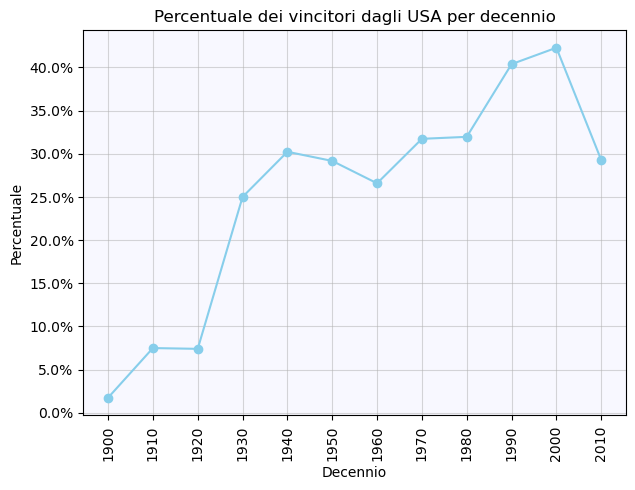

In [11]:
plt.figure(figsize=(7, 5))
plt.rcParams.update({'axes.facecolor':'ghostwhite'})
plt.plot(USA_nobel['Decennio'],USA_nobel['Percentuale'],marker='o',color='skyblue')
plt.xlabel('Decennio')
plt.ylabel('Percentuale')
plt.title('Percentuale dei vincitori dagli USA per decennio')
plt.xticks(USA_nobel['Decennio'],rotation=90)
plt.grid(True, alpha=0.5)
def percent_formatter(x, pos):
    return f'{x}%'

y_format = FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_format)
plt.show()

## 5. Qual è il sesso di un tipico vincitore del Premio Nobel?
<p>Così gli Stati Uniti divennero per primi i primi vincitori del Premio Nobel negli anni '30 e da allora mantennero la posizione di leader. Ma il gruppo che è stato in testa fin dall'inizio e che sembra non mollare mai è quello degli <em>uomini</em>. Forse non dovrebbe sorprendere il fatto che ci sia uno squilibrio tra il numero di vincitori di premi maschili e femminili, ma quanto è significativo questo squilibrio? Ed è meglio o peggio all'interno di specifiche categorie di premi come fisica, medicina, letteratura, ecc.?</p>

In [2]:
from matplotlib.ticker import FuncFormatter

# Extracting the decade from the year column


# Grouping by decade and counting the total number of winners in each decade


# Grouping by decade and counting the number of female winners in each decade


# Calculating the proportion of female winners per decade


# Converting the series to DataFrame for Seaborn plotting


# Plotting using Seaborn


# Aggiungi % nell'asse y vicino al valore


In [19]:
decades=[x for x in range(1900,2020,10)]
intervallo=[x-1 for x in range(1910,2030,10)]
print(decades)
print(intervallo)

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
[1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]


In [60]:
percentuale=[]
for x,y in zip(decades,intervallo):
    tot=nobel[(nobel['year']>=x) & (nobel['year']<=y) ].full_name.value_counts().sum()
    female=nobel[(nobel['year']>=x) & (nobel['year']<=y) & (nobel['sex']=='Female')].full_name.value_counts().sum()
    percentuale.append(round((female*100)/tot,2))


In [61]:
female_nobel=pd.DataFrame({'Decennio':decades,'Percentuale_femmine':percentuale})

female_nobel

,Decennio,Percentuale_femmine
0,1900,5.26
1,1910,2.50
2,1920,3.70
3,1930,5.36
4,1940,6.98
5,1950,0.00
6,1960,3.80
7,1970,3.85
8,1980,4.12
9,1990,6.73


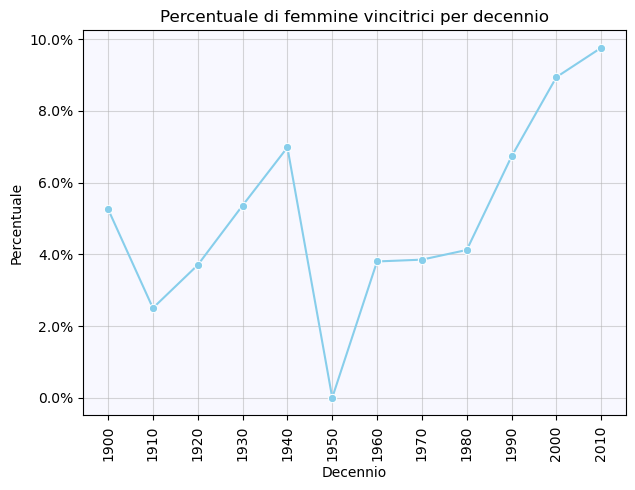

In [57]:
plt.figure(figsize=(7, 5))
plt.rcParams.update({'axes.facecolor':'ghostwhite'})
sns.lineplot(data=female_nobel,x='Decennio',y='Percentuale_femmine',marker='o',color='skyblue')
plt.xlabel('Decennio')
plt.ylabel('Percentuale')
plt.title('Percentuale di femmine vincitrici per decennio')
plt.xticks(female_nobel['Decennio'],rotation=90)
plt.grid(True, alpha=0.5, zorder=1)
def percent_formatter(x, pos):
    return f'{x}%'

y_format = FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_format)
plt.show()

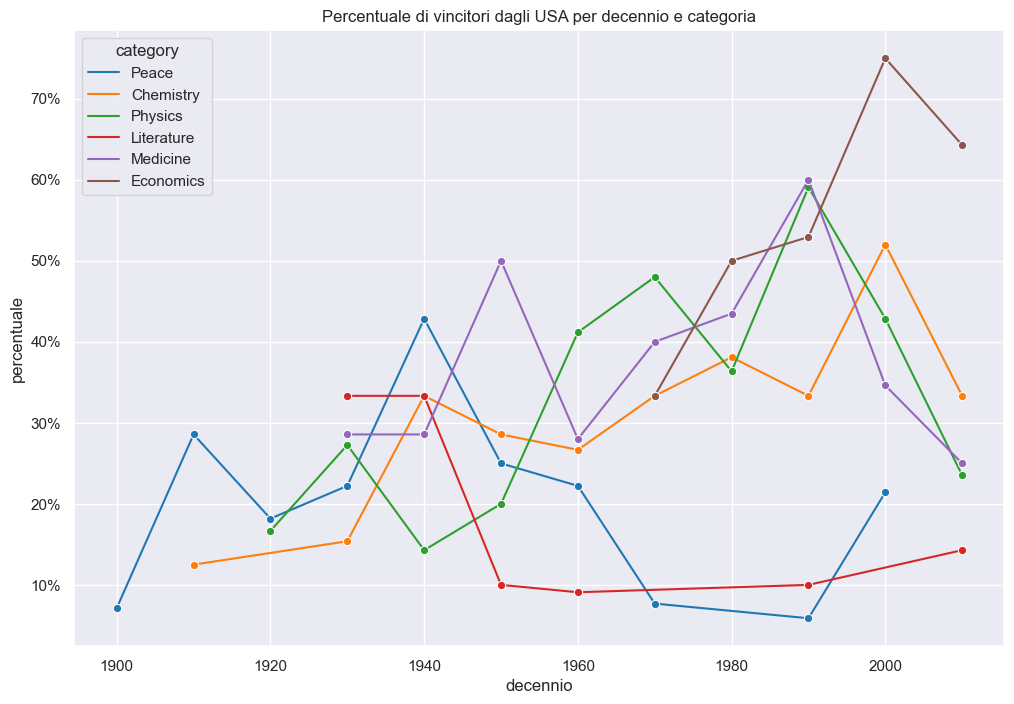

In [62]:
# Extracting the decade from the year column


# Grouping by decade and category, and counting the total number of winners in each group


# Grouping by decade and category, and counting the number of USA-born winners in each group


# Merging the two datasets and calculating the proportion


# Plotting using Seaborn


# Adding % sign to y-axis values


In [6]:
decades=[x for x in range(1900,2020,10)]
intervallo=[x-1 for x in range(1910,2030,10)]
category_nobel=pd.DataFrame(columns=nobel.category.value_counts().index)
for x,y in zip(decades,intervallo):
    categoria=[]
    for name in (nobel.category.value_counts().index):
        tot=nobel[(nobel['year']>=x) & (nobel['year']<=y) & (nobel['category']==name) ].category.value_counts().sum()
        categoria.append(tot)
    category_nobel.loc[decades.index(x)]=categoria
category_nobel.insert(0,'Decenni',decades,True)
category_nobel

category,Decenni,Medicine,Physics,Chemistry,Peace,Literature,Economics
0,1900,11,13,9,14,10,0
1,1910,6,10,8,7,9,0
2,1920,11,12,10,11,10,0
3,1930,14,11,13,9,9,0
4,1940,14,7,9,7,6,0
5,1950,20,20,14,8,10,0
6,1960,25,17,15,9,11,2
7,1970,25,25,15,13,11,15
8,1980,23,22,21,11,10,10
9,1990,20,22,18,17,10,17


In [170]:
category_USA=pd.DataFrame(columns=nobel.category.value_counts().index)
for x,y in zip(decades,intervallo):
    categoria=[]
    for name in (nobel.category.value_counts().index):
        tot=nobel[(nobel['year']>=x) & (nobel['year']<=y) & (nobel['category']==name)  & (nobel['birth_country']=='United States of America') ].category.value_counts().sum()
        categoria.append(tot)
    category_USA.loc[decades.index(x)]=categoria
category_USA.insert(0,'Decennio',decades,True)
category_USA

,Decennio,Medicine,Physics,Chemistry,Peace,Literature,Economics
0,1900,0,0,0,1,0,0
1,1910,0,0,1,2,0,0
2,1920,0,2,0,2,0,0
3,1930,4,3,2,2,3,0
4,1940,4,1,3,3,2,0
5,1950,10,4,4,2,1,0
6,1960,7,7,4,2,1,0
7,1970,10,12,5,1,0,5
8,1980,10,8,8,0,0,5
9,1990,12,13,6,1,1,9


In [171]:
category_percent=round((category_USA/category_nobel)*100,2)
del category_percent['Decennio']
category_percent.insert(0,'Decennio',decades,True)
category_percent


,Decennio,Chemistry,Decenni,Economics,Literature,Medicine,Peace,Physics
0,1900,0.00,NaN,NaN,0.00,0.00,7.14,0.00
1,1910,12.50,NaN,NaN,0.00,0.00,28.57,0.00
2,1920,0.00,NaN,NaN,0.00,0.00,18.18,16.67
3,1930,15.38,NaN,NaN,33.33,28.57,22.22,27.27
4,1940,33.33,NaN,NaN,33.33,28.57,42.86,14.29
5,1950,28.57,NaN,NaN,10.00,50.00,25.00,20.00
6,1960,26.67,NaN,0.00,9.09,28.00,22.22,41.18
7,1970,33.33,NaN,33.33,0.00,40.00,7.69,48.00
8,1980,38.10,NaN,50.00,0.00,43.48,0.00,36.36
9,1990,33.33,NaN,52.94,10.00,60.00,5.88,59.09


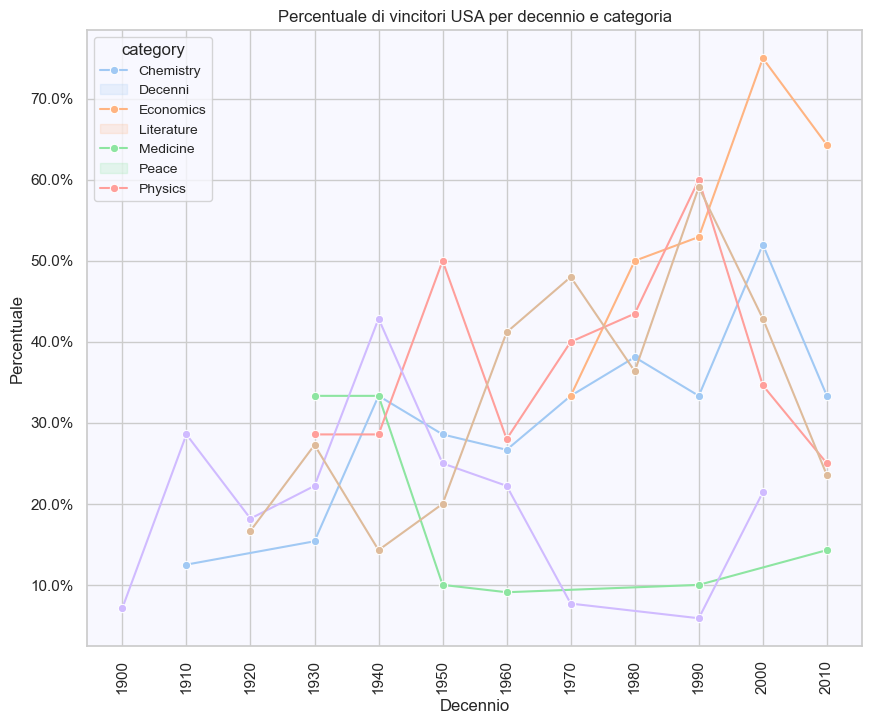

In [177]:
plt.figure(figsize=(10, 8))
plt.rcParams.update({'axes.facecolor':'ghostwhite'})
for i in category_percent.columns.drop('Decennio'):
    sns.lineplot(data=category_percent[(category_percent[i]>0) & (category_percent[i].notna())],x='Decennio',y=i,marker='o')
    
plt.xlabel('Decennio')
plt.ylabel('Percentuale')
plt.title('Percentuale di vincitori USA per decennio e categoria')
plt.xticks(category_percent['Decennio'],rotation=90)
legenda=plt.legend(category_percent.columns.drop('Decennio'),prop={'size': 10},loc=2)
legenda.set_title('category')
def percent_formatter(x, pos):
        return f'{x}%'
y_format = FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_format)
plt.grid(True)

## 6. La prima donna a vincere il Premio Nobel
<p>La trama qui sopra è un po' confusa poiché le linee sono sovrapposte. Ma mostra alcune tendenze e modelli interessanti. Nel complesso lo squilibrio è piuttosto ampio, con fisica, economia e chimica che presentano lo squilibrio maggiore. La medicina ha un andamento piuttosto positivo e dagli anni Novanta anche il premio letterario è più equilibrato. Il grande valore anomalo è il premio per la pace nel corso degli anni 2010, ma tieni presente che questo copre solo gli anni dal 2010 al 2016.</p>
<p>Dato questo squilibrio, chi è stata la prima donna a ricevere un premio Nobel? E in quale categoria?</p>

In [65]:
# Picking out the first woman to win a Nobel Prize

# Filtra i dati solo con le donne


# Mostra i dettagli della prima donna premiata



,year,full_name,prize,category
19,1903,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903,Physics


In [203]:
female=nobel[nobel['sex']=='Female']
female[['year','full_name','prize','category']][0:1]

,year,full_name,prize,category
19,1903,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903,Physics


## 7. Vincitori ripetuti
<p>Per la maggior parte degli scienziati/scrittori/attivisti un premio Nobel rappresenterebbe il coronamento di una lunga carriera. Ma per alcune persone, uno solo non è sufficiente, e pochi lo hanno ottenuto più di una volta. Chi sono questi pochi fortunati? (Non avendo vinto personalmente alcun premio Nobel, presumo che sia solo una questione di fortuna.)</p>

In [67]:
# Selezione dei vincitori che hanno ricevuto 2 o più premi.

# Raggruppando i dati per "nome_completo" e contando il numero di premi per ciascun vincitore


# Filtraggio dei vincitori che hanno ricevuto 2 o più premi


# Visualizzazione dei vincitori con 2 o più premi


,full_name,numero_di_premi
0,Comité international de la Croix Rouge (Intern...,3
1,Frederick Sanger,2
2,John Bardeen,2
3,Linus Carl Pauling,2
4,"Marie Curie, née Sklodowska",2
5,Office of the United Nations High Commissioner...,2


In [277]:
df=pd.DataFrame({'full_name':nobel.full_name.value_counts().index,'numero_di_premi':nobel.full_name.value_counts()})
df.reset_index(inplace=True,drop=True,)
df[df['numero_di_premi']>=2]

,full_name,numero_di_premi
0,Comité international de la Croix Rouge (Intern...,3
1,Office of the United Nations High Commissioner...,2
2,John Bardeen,2
3,Linus Carl Pauling,2
4,Frederick Sanger,2
5,"Marie Curie, née Sklodowska",2


## 8. Quanti anni hai quando ricevi il premio?
<p>L'elenco dei vincitori ripetuti contiene alcuni nomi illustri! Incontriamo nuovamente Marie Curie, vincitrice del premio in fisica per la scoperta delle radiazioni e in chimica per l'isolamento del radio e del polonio. John Bardeen l’ha ottenuto due volte in fisica per i transistor e la superconduttività, Frederick Sanger l’ha ottenuto due volte in chimica, e Linus Carl Pauling l’ha ottenuto prima in chimica e poi in pace per il suo lavoro nella promozione del disarmo nucleare. Apprendiamo anche che anche le organizzazioni ricevono il premio poiché sia ​​la Croce Rossa che l'UNHCR lo hanno ottenuto due volte.</p>
<p>Ma quanti anni hai generalmente quando ricevi il premio?</p>

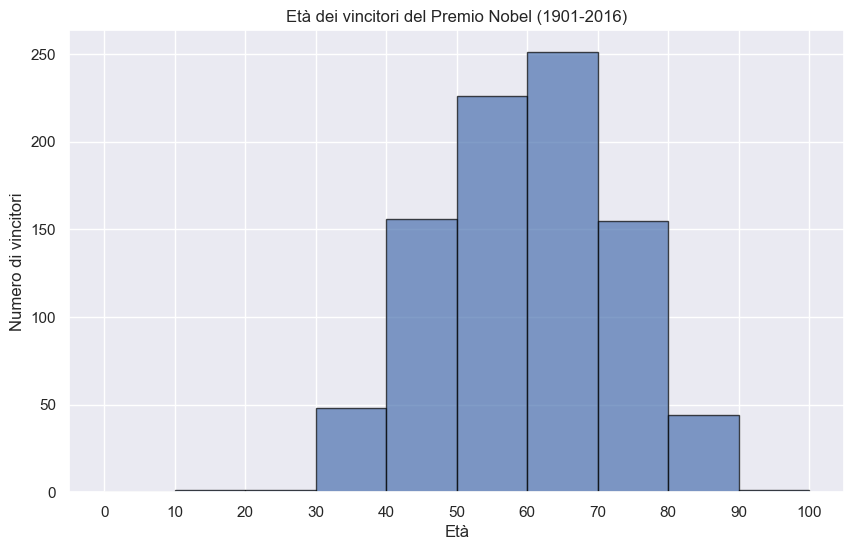

In [68]:
# Conversione di birth_date da String a datetime


# Calcolo dell'età dei vincitori al momento dell'assegnazione del Premio Nobel


#################################### BONUS ####################################

# Gestione dei casi in cui la data di nascita non è disponibile (impostando l'età su NaN in questi casi)


# Tracciare l'età dei vincitori del Premio Nobel


In [4]:
nobel['birth_date']=pd.to_datetime(nobel['birth_date'])
years=nobel['birth_date'].dt.year
nobel.insert(9,'winners_age',(-(years-nobel['year'])))


In [55]:
nobel.tail(60)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,winners_age,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
851,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/4,865,Individual,Brian P. Schmidt,1967-02-24,44.0,"Missoula, MT",United States of America,Male,Australian National University,Weston Creek,Australia,NaN,NaN,NaN
852,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/4,866,Individual,Adam G. Riess,1969-12-16,42.0,"Washington, DC",United States of America,Male,Johns Hopkins University,"Baltimore, MD",United States of America,NaN,NaN,NaN
853,2012,Chemistry,The Nobel Prize in Chemistry 2012,"""for studies of G-protein-coupled receptors""",1/2,878,Individual,Robert J. Lefkowitz,1943-04-15,69.0,"New York, NY",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
854,2012,Chemistry,The Nobel Prize in Chemistry 2012,"""for studies of G-protein-coupled receptors""",1/2,879,Individual,Brian K. Kobilka,1955-05-30,57.0,"Little Falls, MN",United States of America,Male,Stanford University School of Medicine,"Stanford, CA",United States of America,NaN,NaN,NaN
855,2012,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the theory of stable allocations and the ...",1/2,882,Individual,Alvin E. Roth,1951-12-18,61.0,"New York, NY",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,NaN,NaN,NaN
856,2012,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the theory of stable allocations and the ...",1/2,883,Individual,Lloyd S. Shapley,1923-06-02,89.0,"Cambridge, MA",United States of America,Male,University of California,"Los Angeles, CA",United States of America,2016-03-12,"Tucson, AZ",United States of America
857,2012,Literature,The Nobel Prize in Literature 2012,"""who with hallucinatory realism merges folk ta...",1/1,880,Individual,Mo Yan,1955-02-02,57.0,Gaomi,China,Male,NaN,NaN,NaN,NaN,NaN,NaN
858,2012,Medicine,The Nobel Prize in Physiology or Medicine 2012,"""for the discovery that mature cells can be re...",1/2,874,Individual,Sir John B. Gurdon,1933-10-02,79.0,Dippenhall,United Kingdom,Male,Gurdon Institute,Cambridge,United Kingdom,NaN,NaN,NaN
859,2012,Medicine,The Nobel Prize in Physiology or Medicine 2012,"""for the discovery that mature cells can be re...",1/2,875,Individual,Shinya Yamanaka,1962-09-04,50.0,Osaka,Japan,Male,Kyoto University,Kyoto,Japan,NaN,NaN,NaN
860,2012,Peace,The Nobel Peace Prize 2012,"""for over six decades contributed to the advan...",1/1,881,Organization,European Union (EU),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


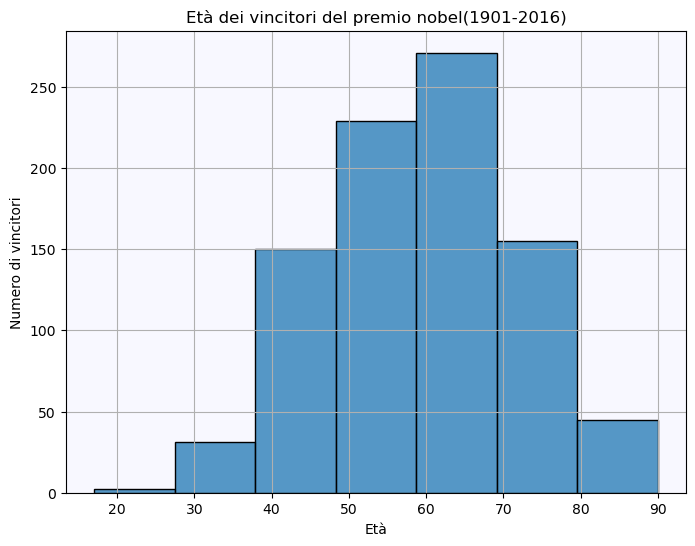

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(nobel['winners_age'],bins=7)
plt.xlabel('Età')
plt.ylabel('Numero di vincitori')
plt.title('Età dei vincitori del premio nobel(1901-2016)')
plt.grid(True)


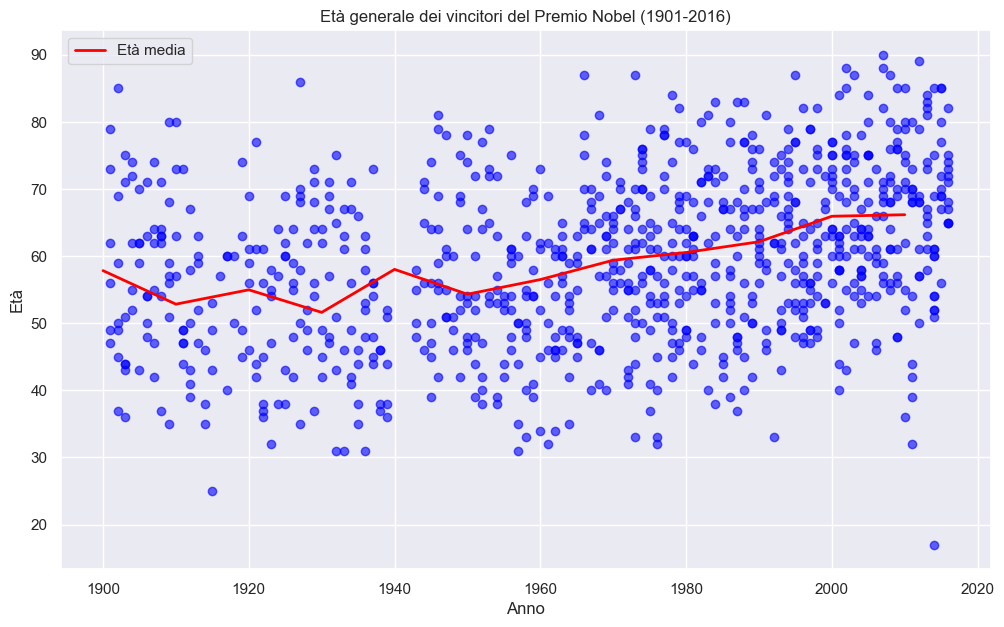

In [70]:
# Calcolare l'età media per ogni decennio


# Visualizzare un grafico con tutte le età e l'età media


# Aggiungere titolo e label


# Mostra


In [2]:
decades=[x for x in range(1900,2020,10)]
intervallo=[x-1 for x in range(1910,2030,10)]
print(decades)
print(intervallo)

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
[1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]


In [21]:
medie=[]
for x,y in zip(decades,intervallo):
    tot=nobel[(nobel['year']>=x) & (nobel['year']<=y) ].winners_age.mean().round(1)
    medie.append(tot)
mean_age=pd.DataFrame({'decenni': decades,'anni':medie})
mean_age


,decenni,anni
0,1900,57.8
1,1910,52.8
2,1920,55.0
3,1930,51.6
4,1940,58.0
5,1950,54.3
6,1960,56.5
7,1970,59.4
8,1980,60.5
9,1990,62.1


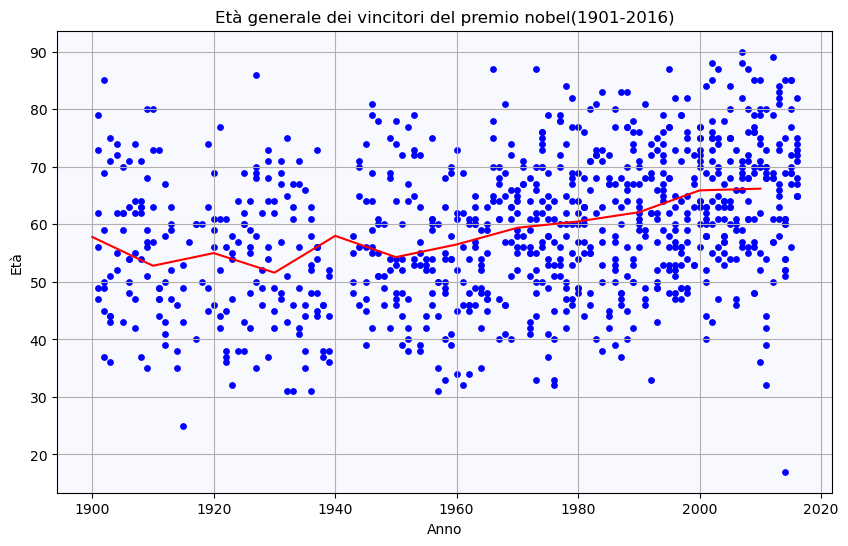

In [32]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'axes.facecolor':'ghostwhite'})
plt.scatter(data=nobel,x='year',y='winners_age',color='blue',s=15)
plt.plot(mean_age.decenni,mean_age.anni,color='r')
plt.grid(True)
plt.ylabel('Età')
plt.xlabel('Anno')
plt.title('Età generale dei vincitori del premio nobel(1901-2016)')
plt.show()